<a href="https://colab.research.google.com/github/AMacmep/-Python--/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC_%D0%A2%D0%B5%D0%BC%D0%B0_6_%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_asyncio%2C_threading_%D0%B8_multiprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сравнение различных подходов к реализации асинхронного программирования: asyncio, threading и multiprocessing: Реализовать асинхронные задачи с использованием asyncio, threading и multiprocessing, сравнить их производительность и уместность для различных типов задач.



#Введение
Асинхронное программирование — концепция программирования, при которой результат выполнения функции доступен не сразу, а через некоторое время в виде асинхронного (нарушающего обычный порядок выполнения) вызова.

В асинхронном программировании длительные операции запускаются без ожидания их завершения и не блокируют дальнейшее выполнение программы.

Цели, которые преследует асинхронное программирование - ускорение процессов. В идеале, итог работы асинхронных функций изображен на рис.1

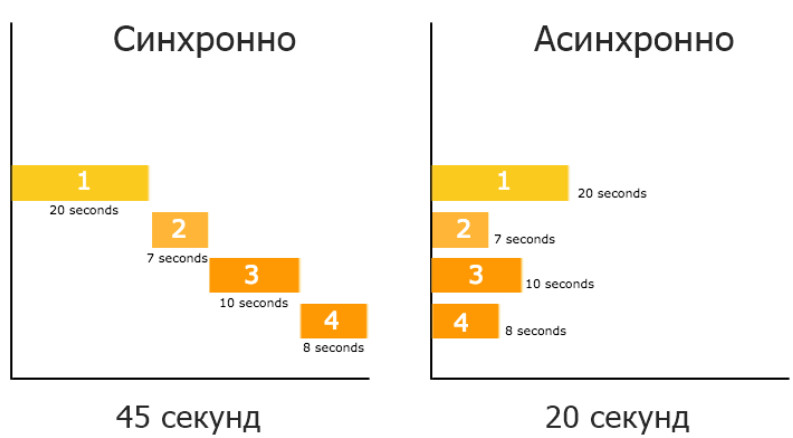

Реализация принципов асинхронного можно осуществить различными методами. Рассмотрим особенности реализации асинхронного программирования в Python.

# Цели
В качестве цели данной работы определим следующее:

Ознакомиться с принципами асинхронного программирования, методами оптимизации кода для ускорения расчетов и эффективного использования ресурсов.
Изучить принципы работы пакетов asyncio. threading и multiprocessing.
Выяснить почему методы asyncio всегда несколько быстрее чем методы threading? Когда следует использовать threading, asyncio или multiprocessing?
В чем разница между multiprocessing, threading и asyncio?

#Asyncio
Метод асинхронного программирования с использованием модуля asyncio.
Асинхронность в python была стандартизирована сравнительно недавно. Библиотека asyncio появилась впервые в версии 3.5 (то есть в 2015 году).
При этом асинхронность acyncio — однопоточный, однопроцессорный дизайн, использующий многозадачность. Другими словами, asyncio создает впечатление параллелизма, используя один поток в одном процессе.
Фактически работа данной функции можно изобразить следующим образом (рис.2)

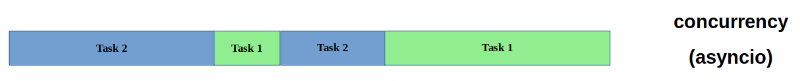

В качестве примера разберем код по вычислению числа Пи методом Монте-Карло с обработкой 10^6 и 10^7 случайных значений. Также в коде добавим искусственный "замедлитель" для оценки воздействия на время выполнения расчётов.

In [4]:
import time
import random

time_sleep=3

def pi_approximation(n):
    time.sleep(time_sleep)  # Пауза перед расчетом.
    inside_circle = 0
    for _ in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x ** 2 + y ** 2 <= 1:
            inside_circle += 1
    pi_approx = (inside_circle / n) * 4
    return print(f"Приблизительное значение π для n = {n}: {pi_approx}")


def main():
    n_values = [10**7, 10**7, 10**6, 10**6]


    start_time = time.time()

    for n in n_values:
        pi_approximation(n)


    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Общее время выполнения: {execution_time:.2f} секунд")


if __name__ == "__main__":
    main()

Приблизительное значение π для n = 10000000: 3.1412928
Приблизительное значение π для n = 10000000: 3.141736
Приблизительное значение π для n = 1000000: 3.14296
Приблизительное значение π для n = 1000000: 3.143404
Общее время выполнения: 27.26 секунд


Выполним эти-же вычисления с использованием модуля asyncio

In [5]:
import asyncio
import random
import time

time_sleep = 3

async def pi_approximation(n):
    await asyncio.sleep(time_sleep)  # Асинхронная пауза перед расчетом
    inside_circle = 0
    for _ in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x ** 2 + y ** 2 <= 1:
            inside_circle += 1
    pi_approx = (inside_circle / n) * 4
    return pi_approx

async def main():
    n_values = [10 ** 7, 10 ** 7, 10 ** 6, 10 ** 6]
    results = []

    start_time = time.time()  # Начало отсчета времени

    # Запускаем все корутины с помощью gather
    tasks = [pi_approximation(n) for n in n_values]
    results = await asyncio.gather(*tasks)

    for n, pi_value in zip(n_values, results):
        print(f"Приблизительное значение π для n = {n}: {pi_value}")

    end_time = time.time()  # Конец отсчета времени
    execution_time = end_time - start_time
    print(f"Время выполнения: {execution_time:.2f} секунд")

# Запуск основной функции
await main() #В Google Collab работает такой алгоритм, в PyCharm выполняется asincio.run(main())

Приблизительное значение π для n = 10000000: 3.1420908
Приблизительное значение π для n = 10000000: 3.1411888
Приблизительное значение π для n = 1000000: 3.139884
Приблизительное значение π для n = 1000000: 3.139528
Время выполнения: 18.19 секунд


Время выполнения вычислений меньше, чем в "синхронном" режиме. Из чего же складывается это время и откуда взялась "экономия"?

Итоговый результат мы получили раньше, потому-что выполняли операцию sleep параллельно (одновременно, сразу) при выполнении модулей, таким образом пока ушли в ожидание при выполнении первой функции, уже приступили к исполнению второй и так далее.

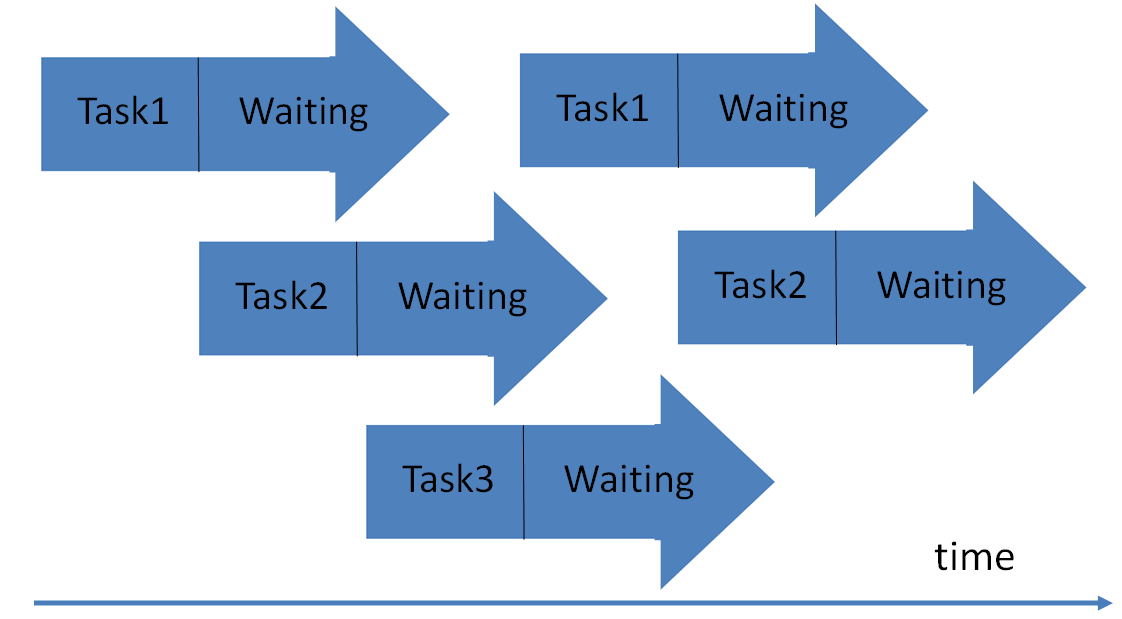

При этом сами вычисления (выборка 10000000 и 1000000 случайных чисел и уточнение числа Пи) выполняются последовательно. Во первых потому-что мы и не задавали их асинхронного вычисления, а во вторых даже при попытке произвести вычисления асинхронно (параллельно) результат времени выполнения мы получим тот-же. Модуль asynsio не задействует дополнительных мощностей, не требует увеличения "затрат" на производство вычислений, а направлен на то, чтобы использовать свободные ресурсы в свободное время, пока осуществляются времязатратные процессы, например процессы запроса данных, соединения с серверами, подключение к базам данных, ожидание ввода данных или ответа на запрос и прочее. Неблокирующее поведение асинхронных программ используется для значительного увеличения производительности в контексте веб-приложения, помогая решить проблему разработки реактивных приложений. И даже в названии модуля asyncio зашифровано его основное назначение и направление использования: от asynchronous I/O (асинхронный ввод/вывод).

Краткий итог по модулю asyncio: данный модуль подходит для выполнения задач, которые включают частое чтение и запись файлов или отправку данных с сервера и обратно. Асинхронные программы выполняют операции ввода-вывода неблокирующим образом, что означает, что они могут выполнять другие задачи, ожидая возврата данных от клиента, а не просто ждать, тратя ресурсы и время. При этом ресурсы машины используются достаточно экономно — больше не создаётся новых процессов, а рационально используются ресурсы в рамках одного процесса.

# Threading
Пакет threading является частью стандартной библиотеки Python начиная с версии 1.5 (ноябрь 1997-го).
Threading — это специальная библиотека для многопоточности в Python. С её помощью можно выполнять несколько операций одновременно, используя разные потоки.
Поток — это минимальная единица работы, запланированная для выполнения операционной системой. В одном процессе может быть несколько потоков, и они разделяют состояние и память родительского процесса.

В случае потоков (пакет threading) интерпретатор Python обращается за дополнительной помощью к операционной системе (ОС). Новый поток создаётся согласно запросу интерпретатора к ОС в примерно следующей логике: “Мне нужно, чтобы задача основного потока выполнялась бы одновременно с задачей нового потока до тех пор, пока этот новый поток не завершится”. В этом случае ОС через строго равные промежутки времени попеременном переключается то на одну, то на другую задачу. Переключение длится доли секунды, поэтому для стороннего наблюдателя обе задачи выполняются как бы параллельно и одновременно.



Попробуем решить нашу задачу, и посмотрим на результаты:

In [6]:
import threading
import time
import random


import time
import random

time_sleep=3

def pi_approximation(n):
    time.sleep(time_sleep)  # Пауза перед расчетом.
    inside_circle = 0
    for _ in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x ** 2 + y ** 2 <= 1:
            inside_circle += 1
    pi_approx = (inside_circle / n) * 4
    return print(f"Приблизительное значение π для n = {n}: {pi_approx}")


def main():
    n_values = [10**7, 10**7, 10**6, 10**6]


    start_time = time.time()

    for n in n_values:

        res = threading.Thread(target=pi_approximation, args=(n,))
        res.start()
        res.join()


    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Время выполнения: {execution_time:.2f} секунд")


if __name__ == "__main__":
    main()

Приблизительное значение π для n = 10000000: 3.141452
Приблизительное значение π для n = 10000000: 3.140636
Приблизительное значение π для n = 1000000: 3.140812
Приблизительное значение π для n = 1000000: 3.140316
Время выполнения: 27.41 секунд


Результаты оказались не впечатляющими.
Время выполнения вычислений (с учетом ожидания, которое рассматривается и выполняется программой полностью как необходимая часть вычислений), оказалось даже больше, чем при синхронном - последовательном выполнении задачи. И напрашивается вывод, что пакет threading совершенно бесполезен, а модуль asyncio в отличие от Threading эффективен.

Но на самом деле, проблема в неккоректном коде. В приведенном примере, потоки были созданы, но выполнялись (стартовали) последовательно, таким образом и выполнение осуществлялось как в синхронном режиме. Ещё дополнительно были затрачены ресурсы и время на создание потоков. В итоге на расчёты было затрачено больше времени, чем при простом синхронном выполнении вычислений.

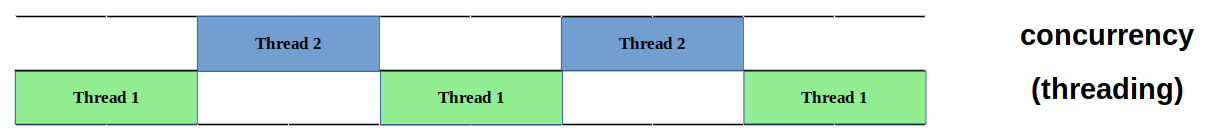

Внесем изменения в код, и посмотрим на результат.

In [7]:
import time
import random
import threading

# Продолжительность паузы перед началом расчета
time_sleep = 3

# Функция для вычисления приближенного значения π
def pi_approximation(n, results, index):
    time.sleep(time_sleep)  # Пауза перед расчетом
    inside_circle = 0
    for _ in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x ** 2 + y ** 2 <= 1:
            inside_circle += 1
    pi_approx = (inside_circle / n) * 4
    print(f"Приблизительное значение π для n = {n}: {pi_approx}")  # Вывод на печать результатов

def main():
    n_values = [10**7, 10**7, 10**6, 10**6]
    results = [0] * len(n_values)  # Список для результатов
    threads = []  # Список для хранения потоков

    start_time = time.time()

    # Создание и запуск потоков
    for i, n in enumerate(n_values):
        thread = threading.Thread(target=pi_approximation, args=(n, results, i))
        thread.start()
        threads.append(thread)

    # Ожидание завершения всех потоков
    for thread in threads:
        thread.join()

    # Вывод результатов
    for n, pi_value in zip(n_values, results):
        pi_value

    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Время выполнения: {execution_time:.2f} секунд")

if __name__ == "__main__":
    main()

Приблизительное значение π для n = 1000000: 3.143292
Приблизительное значение π для n = 1000000: 3.14188
Приблизительное значение π для n = 10000000: 3.1417988
Приблизительное значение π для n = 10000000: 3.1417856
Время выполнения: 18.35 секунд


При параллельном запуске потоков расчёты выполнены быстрее, чем при синхронном выполнении, но время оказалось больше, чем при асинхронном расчёте с использованием модуля asyncio. Не смотря на то, что многопоточность по логике должна быть эффективнее асинхронности, наши результаты объяснимы. Во первых  для вычисления мы задействуем все ту же машину с теми же вычислительными мощностями, и с учетом того что в Python используется GIL (Global Interpreter Lock), который однопоточный, все потоки, которые создаются с помощью threading будут работать внутри потока GIL. А так как threading будет выполняться только на одном ядре процессора, то чем больше потоков, тем чаще происходит переключение контекста, что увеличивает время, затрачиваемое на выполнение вычислений, и в итоге замедляет работу. При выполнении кода с использованием модуля threading время задержки (sleep) также исполняется при всех вычислениях, в то время как при использовании модуля asyncio время задержки используется для вычислений других функций.

Применение многопоточности эффективно, если требуется выполнять несколько задач одновременно, например: Обрабатывать нажатие кнопки в графическом интерфейсе. Если по нажатию кнопки надо производить много действий, которые требуют времени, то эти действия надо выполнять в другом потоке, чтобы графический интерфейс не подвис на это время. Соответственно кнопки надо блокировать, а как поток завершит вычисления — обратно разблокировать; Если необходимо загружать файлы из сети и одновременно обрабатывать уже загруженные.

Плюс этого метода: сам Python-код для каждого потока остаётся неизменным, поток — это всего лишь экземпляр класса Thread, а его управление осуществляется с помощью двух методов start() и join().
Из минусов стоит отметить:
Данные по каждому “спящему” потоку надо где-то хранить, а это требует дополнительных ресурсов памяти.
Само переключение потоков с чтением/записью данных тоже требует времени. И чем больше задействовано потоков, тем ощутимее эта величина.
Управлением потоками занимается не интерпретатор Python, а ОС. Следовательно, переключение происходит не по принципу актуальности выполнения того или иного потока, а по принципу очерёдности, произвольно определяемой ОС. Что не всегда рационально.
Threading - это подход к многозадачности, при котором приложение использует несколько потоков для выполнения задач параллельно. С помощью модуля threading создаются потоки, однако из-за GIL (глобальной блокировки интерпретатора) только один может выполнять Python-код в конкретный момент времени.
В итоге работы модуля получаем следующие эффекты:
Разделение: задачи разделяются на несколько потоков, которые выполняются по очереди.

Общий доступ к памяти: могут использовать общую память для обмена данными.
Эффективность в I/O: GIL освобождается во время операций ввода-вывода, позволяя другим потокам работать.

Легковесность: создание потока требует меньше ресурсов, чем создание отдельного процесса.

Кооперативная многозадачность: Python планирует выполнение потоков на основе их состояния и времени выполнения.

Гибкость управления: можно запускать, останавливать и синхронизировать потоки.
Данный метод асинхронного программирования эффективно использовать для обработки сетевых операций (обработка API-запросов, загрузка информации с веб-сайтов, работа с многопользовательскими соединениями, веб-скрапинг и парсинг контента, обслуживание чатов или мессенджеров, управление веб-серверами).

Работа с файлами (одновременное чтение и запись нескольких файлов, архивирование больших объемов информации, потоковая передача, обработка логов в реальном времени, работа с файлами CSV или JSON, импорт/экспорт).
Для работы с базами данных (асинхронные запросы, массовое обновление записей,репликация в фоновом режиме, выполнение длительных SQL-запросов, параллельная запись, синхронизация между системами)

Управление устройствами: Одновременная работа с несколькими устройствами ввода-вывода. Управление камерами или датчиками в реальном времени. Мониторинг серверов и оборудования. Управление очередями задач на принтерах или сканерах. Запуск фоновых служб на IoT-устройствах. Потоковая обработка данных с устройств.

Работа приложений реального времени: Многопользовательские онлайн-игры. Программы для видеоконференций. Потоковая трансляция медиа. Обработка сигналов.
Управление мультимедийными плеерами. Системы мониторинга в реальном времени.
Автоматизация: Автоматизация тестирования. Параллельный запуск скриптов или программ. Мониторинг систем или приложений. Асинхронная обработка уведомлений.
Управление очередями задач.

# Multiprocessing

Перейдем к модулю который позволяет создавать процессы и управлять ими. Каждый такой процесс выполняется в своем собственном пространстве памяти и имеет свой собственный интерпретатор Python. Это означает, что каждый процесс может выполняться независимо и не зависит от выполнения других процессов. Multiprocessing порождает отдельные интерпретаторы и назначает каждому процессу свою область памяти.

Модуль multiprocessing был представлен в Python 2.6 в 2008 году и был доступен в Python 3.x с момента его создания. Multiprocessing в Python — это стандартная библиотека для создания и управления процессами. Она позволяет использовать несколько процессов для параллельного выполнения кода, что обеспечивает более эффективное использование многоядерных процессоров, multiprocessing ускоряет работу Python кода, но в урон большего потребления ресурсов. Ускорение работы Python при мультипроцессорном коде происходит потому-что при запуске каждый процесс имеет свои ресурсы и свой GIL, именно из-за этого происходит большее потребление ресурсов.

Multiprocessing характеризуется следующими особенностями:

Независимость: каждый процесс выполняется в своей среде и не разделяет память.
Обход GIL: каждый процесс имеет собственный интерпретатор Python, позволяя использовать несколько ядер CPU.

Управление: модуль предоставляет классы и функции для запуска, остановки и управления процессами.

Обмен данными: процессы могут обмениваться сведениями через очереди, каналы или общую память.

Повышение производительности: вычислительные задачи выполняются быстрее, так как работа выполняется параллельно.

Выполним расчёт нашей задачи с использованием модуля Multiprocessing.

In [1]:
import time
import random
import multiprocessing

time_sleep =3


def pi_approximation(n):
    time.sleep(time_sleep)  # Пауза перед расчетом
    inside_circle = 0
    for _ in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x ** 2 + y ** 2 <= 1:
            inside_circle += 1
    pi_approx = (inside_circle / n) * 4
    return pi_approx  # Возвращаем значение π


def main():
    n_values = [10 ** 7, 10 ** 7, 10 ** 6, 10 ** 6]

    # Создаем пул процессов
    with multiprocessing.Pool(4) as pool:
        results = pool.map(pi_approximation, n_values)

    # Вывод результатов
    for n, pi_value in zip(n_values, results):
        print(f"Приблизительное значение π для n = {n}: {pi_value}")


if __name__ == "__main__":
    start_time = time.time()

    main()  # Вызываем основную функцию

    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Общее время выполнения: {execution_time:.2f} секунд")

Приблизительное значение π для n = 10000000: 3.1413472
Приблизительное значение π для n = 10000000: 3.1419048
Приблизительное значение π для n = 1000000: 3.139732
Приблизительное значение π для n = 1000000: 3.14324
Общее время выполнения: 10.38 секунд


При разделении задачи на 4 потока и задействовании в расчете четырех независимых процессов расчёт выполняется за время необходимое на расчет самой "тяжелой" (самой длительно вычисляемой) функции. Этот способ наиболее эффективен для больших расчётов, и при этом самый требовательный к ресурсам.
При этом, если задействовать в решении 1 процесс `"with multiprocessing.Pool(1) as pool:"`, то время выполнения будет таким-же как в первоначальной синхронной - последовательной задаче.

Когда Multiprocessing следует использовать, когда он более всего эффективен?

Обработка больших данных: Анализ больших массивов. Построение сложных математических моделей. Обработка изображений или видео. Машинное обучение и глубокое обучение. Генерация данных для симуляций.

Работа с внешними системами: Параллельная обработка из разных источников.Автоматизация сложных расчетов. Одновременное выполнение долгих операций, таких как сжатие файлов. Интеграция с системами мониторинга или аналитики. Подготовка отчетов с тяжелыми вычислениями. Параллельная работа с API сторонних сервисов.
Задачи реального времени: Обработка от нескольких устройств одновременно. Одновременное управление роботизированными системами. Анимация и рендеринг в 3D. Высокопроизводительные симуляции. Управление потоками в реальном времени. Ускорение работы онлайн-приложений.

Работа с файлами: Многопоточное сжатие и шифрование. Параллельная обработка файлов в больших директориях. Быстрое преобразование в различных форматах. Генерация отчетов или графиков. Работа с большими текстовыми файлами. Ускорение анализа логов.

Обработка массивов: Распараллеливание операций с большими таблицами. Одновременная обработка строковых данных. Быстрая сортировка и фильтрация массивов. Выполнение сложных агрегаций. Построение больших графиков или сетей.

# Заключение
В ходе проведенного исследования принципов асинхронного программирования мы подтвердили необходимость и эффективность от применения таких модулей как asyncio, threading и multiprocessing. Не смотря на различные схемы работы асинхронных модулей время выполнения задачи во всех случаях уменьшилось. Практической задачей была подтверждена теория принципов работы модулей и объяснены получившиеся результаты.

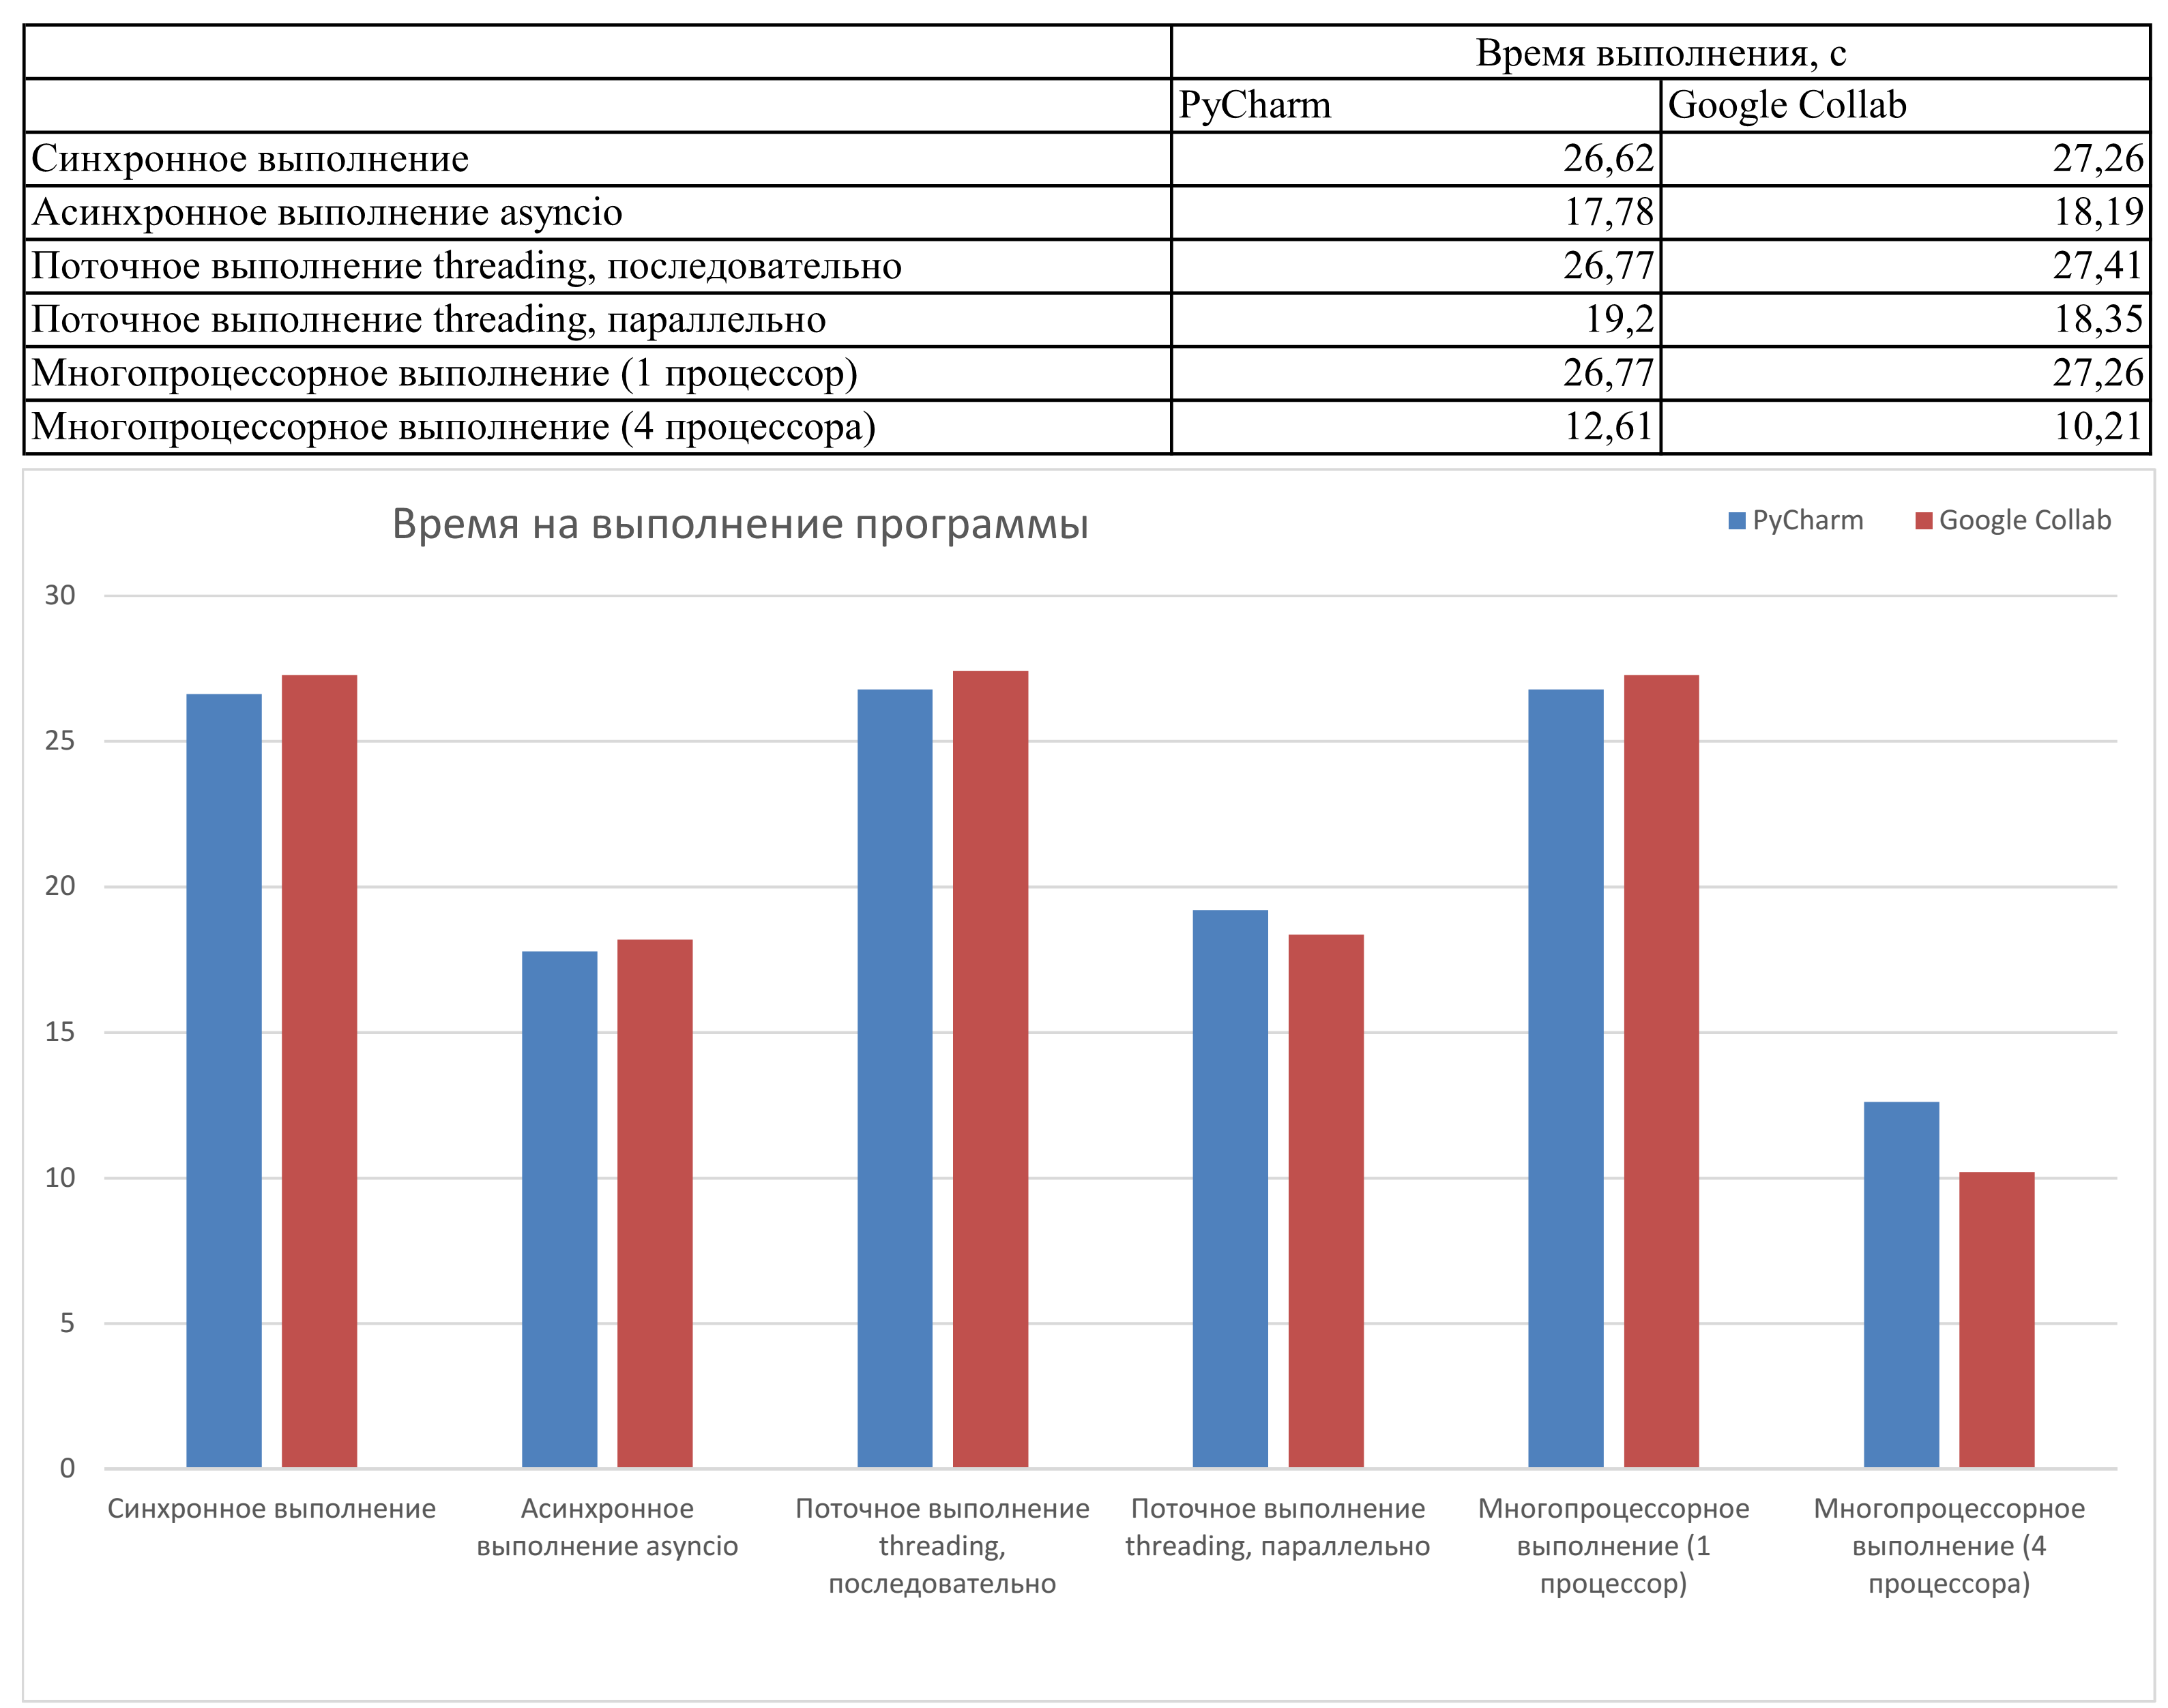

Для качественной работы программ необходимо применять те методы асинхронного программирования, которые обеспечивают наибольшую эффективность, при этом не забывать о затрачиваемых ресурсах и обеспечивать контроль за правильным выполнением задач, так как применение надстроек кроме ускорения могут внести негатив

Возможности языка Python не ограничиваются тремя библиотеками (asyncio, threading и multiprocessing) для асинхронного программирования и ускорения работы программ.

Для оптимизации работы кода могут применяться также и другие модули, например:

Пакет subprocess, позволяет создавать дополнительные процессы, в которых можно запускать различные программы.
Пакет concurrent.futures предоставляет удобный интерфейс асинхронных задач и параллельных вычислений. Может применяться в простых сценариях, скрывая детали создания и управления потоками или процессами.
Пакеты curio и trio для работы с корутинами.
Пакет select используется для организации асинхронной работы сокетов (пакет socket). Кроме того, в пакете socket существуют отдельные “асинхронные” методы и функции, входящие в состав обычных “синхронных” пакетов.

Для определения необходимости применения того или иного пакета или библиотеки асинхронного программирования необходимо опираться на задачи, которые требуется решить при составлении программы, и изучив особенности и возможности конкретного модуля использовать в коде добиваясь наибольшей эффективности работы приложений.

# Список литературы
https://tonais.ru/library/asinhronnoe-programmirovanie-dlya-veb-razrabotki-v-python

https://it4each.com/blog/threading-multiprocessing-i-asyncio-v-python-chast-3/

https://senjun.ru/courses/python/chapters/python_chapter_0300/

https://all-python.ru/osnovy/threading.html

https://habr.com/ru/articles/149420/

https://otus.ru/journal/rabota-s-potokami-v-pitone/

https://sky.pro/media/multiprocessing-i-threading-v-python-chto-vybrat/

https://vc.ru/u/1308545-eskander-baisiev/510288-asyncio-threading-multiprocessing-kak-polzovatsya

https://simple-blog.vercel.app/2021/02/11/threading-asyncio-multiprocessing/

https://kedu.ru/press-center/articles/info-kogda-ispolzovat-multithreading-i-multiprocessing-v-python-polnoe-rukovodstvo/

https://www.blog.pythonlibrary.org/2016/08/02/python-201-a-multiprocessing-tutorial/

https://webdevblog.ru/obzor-async-io-v-python-3-7/